In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from random import sample
from math import sqrt

In [243]:
# Copiadas do notebook PCA

def mostra_populacoes(pops):
    for i, pop in enumerate(pops):
        # Implemente como mostrar a população pop na posição i da lista
        X, Y = dados_2d.T
        plt.scatter(X, Y, label='dados')
    
    plt.legend()
    plt.show()

Tamanhos: d1=(100, 46), d2=(100, 46), d2=(100, 46), d4=(100, 46), dados=(400, 46)


# Métodos de agrupamento: K-means



In [244]:
pca = PCA(2).fit(dados)
dados_2d = pca.transform(dados)

print('Formato:', dados_2d.shape)

Formato: (400, 2)


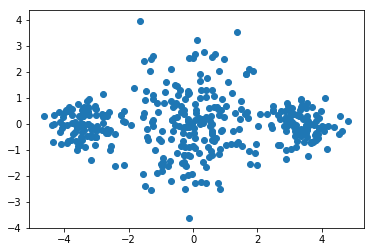

In [245]:
X, Y = dados_2d.T

plt.scatter(X, Y)
plt.show()

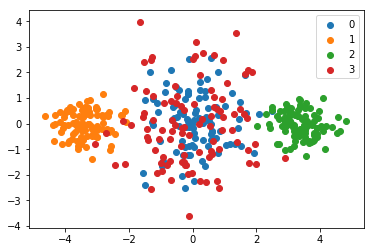

In [257]:
df = pd.read_csv('/home/chips/downloads/banco-indel-total.csv', skiprows=1, index_col=5)
for col in ['size', 'country', 'ethnicity', 'size.1']:
    del df[col]
    
def convert(x):
    if x in ('Africa', 'Europe', 'America', 'EastAsia', 'Centra-South-ASIA', 'Middle-East', 
             'Oceania', 'Quilombo'):
        return x
    elif x == '-9-9' or 'G' in x or 'N' in x or '3' in x:
        return float('nan')
    elif x == 'AA':
        return 0
    elif x == 'AC' or x == 'CA':
        return 1
    elif x == 'CC':
        return 2
    raise ValueError(x)

df = df.applymap(convert)
df = df[(df.continent == 'Africa')
        | (df.continent == 'Europe') 
        | (df.continent == 'EastAsia') 
        | (df.continent == 'America') 
        | (df.continent == 'Quilombo') ]

df['continent'] = df.continent.map(lambda x: 'Asia' if x == 'EastAsia' else x)

In [262]:
with open('populations.csv', 'w') as fd: df.to_csv(fd)

In [ ]:
df = df.fillna(df.mean())
continentes = df.pop('continent')



In [198]:
set(continentes)

{'Africa', 'America', 'EastAsia', 'Europe', 'Quilombo'}

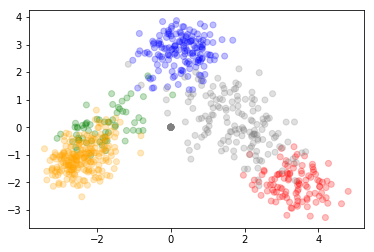

In [196]:
pca = PCA(2).fit(df.values)
dados_2d = pca.transform(df.values)

X, Y = dados_2d.T
plt.scatter(X, Y, color=continentes.apply(cores.get), alpha=0.25)
plt.show()

In [117]:
plt.scatter?

In [143]:
data = np.random.randint(0, 3, size=(1000, 3))
centroides = sample(list(data), 4)

In [144]:
def distancia(x, y):
    return sqrt(sum((x - y)**2))

u = np.array([10, 8])
v = np.array([13, 4])
print('Distância entre vetores:', distancia(u, v))

Distância entre vetores: 5.0


In [159]:
def mais_proximo(x, centros):
    menor_idx = 0
    menor_distancia = float('inf')
    for i, centro in enumerate(centros):
        d = distancia(x, centro)
        if d < menor_distancia:
            menor_distancia = d
            menor_idx = i
    return menor_idx
    
x = data[0]
print('Centróide mais próximo de x:', mais_proximo(x, centroides))

Centróide mais próximo de x: 1


In [173]:
def atribui_grupos(pop, centros):
    grupos = [[] for _ in centros]
    
    for x in pop:
        idx = mais_proximo(x, centros)
        grupos[idx].append(x)
    return grupos

grupos = atribui_grupos(data, centroides)
print('Tamanho de cada grupo:', [len(g) for g in grupos])

Tamanho de cada grupo: [261, 319, 74, 346]


In [214]:
def centroide(grupo):
    return sum(grupo) / len(grupo)

g = grupos[0]
print('Centróide do grupo:', calcula_centroide(g))

Centróide do grupo: [1.72796935 0.29501916 0.70881226]


In [215]:
def centroides(grupos):
    return [centroide(g) for g in grupos]

print('Centróides de cada grupo:')
display(calcula_centroides(grupos))

Centróides de cada grupo:


[array([1.72796935, 0.29501916, 0.70881226]),
 array([0.67398119, 1.10344828, 0.35423197]),
 array([0.        , 2.        , 0.47297297]),
 array([1.02601156, 1.28034682, 1.79768786])]

In [222]:
def vq(grupo):
    centro = centroide(grupo)
    return sum(distancia(g, centro)**2 for g in grupo)

In [223]:
def kmeans(dados, k=4, loops=20):
    centros = sample(list(dados), k)
    for _ in range(loops):
        grupos = atribui_grupos(dados, centros)
        centros = centroides(grupos)
    print(sum(vq(g) for g in grupos))
    return [np.array(g) for g in grupos]

10858.075973346782


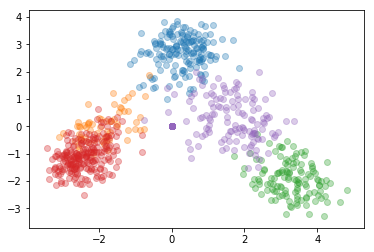

In [226]:
for group in kmeans(df.values, 5):
    X, Y = pca.transform(group).T
    plt.scatter(X, Y, alpha=0.33)
plt.show()

In [151]:
df.values.shape

(1104, 46)